# Topics
* What is Hyperparameter
* GridSearch
* Cross Validation
* how to use GridSearch

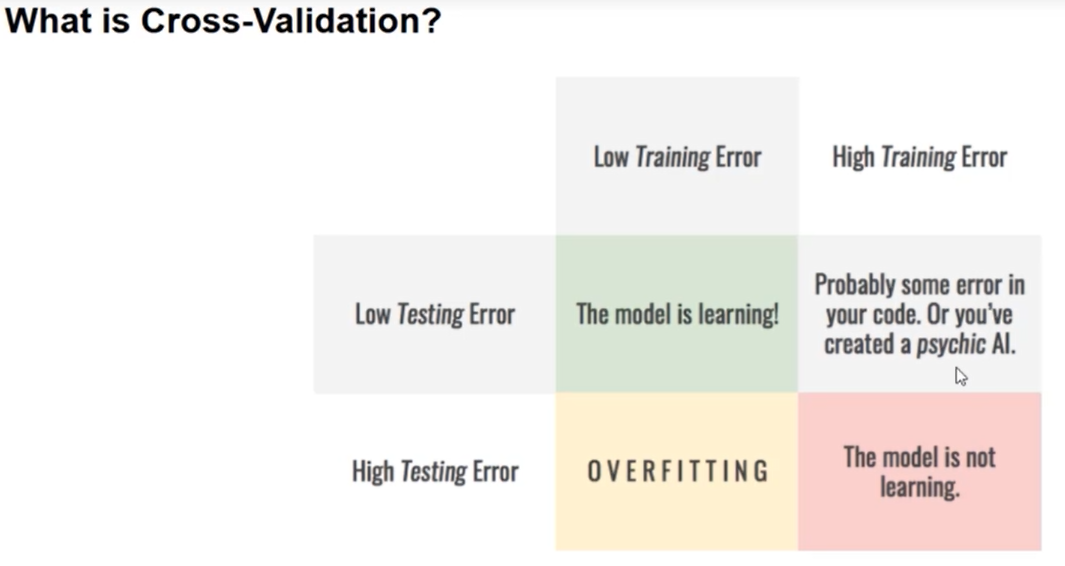
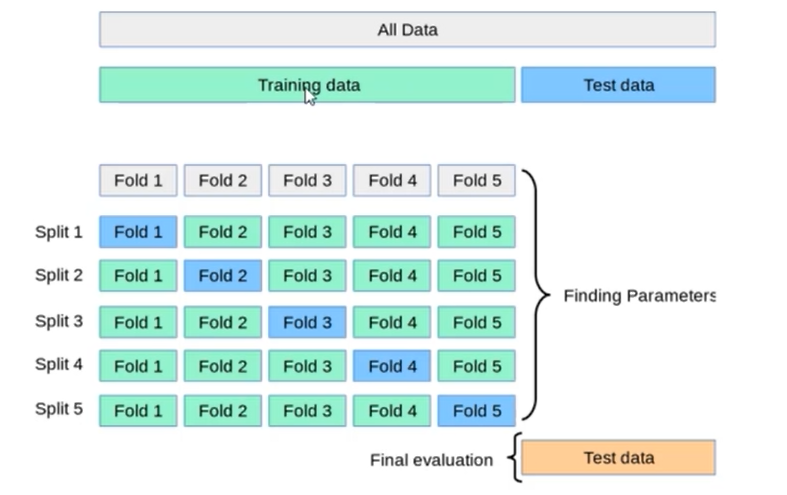
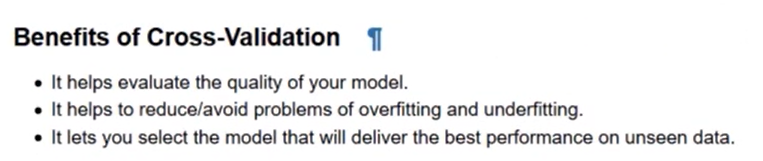
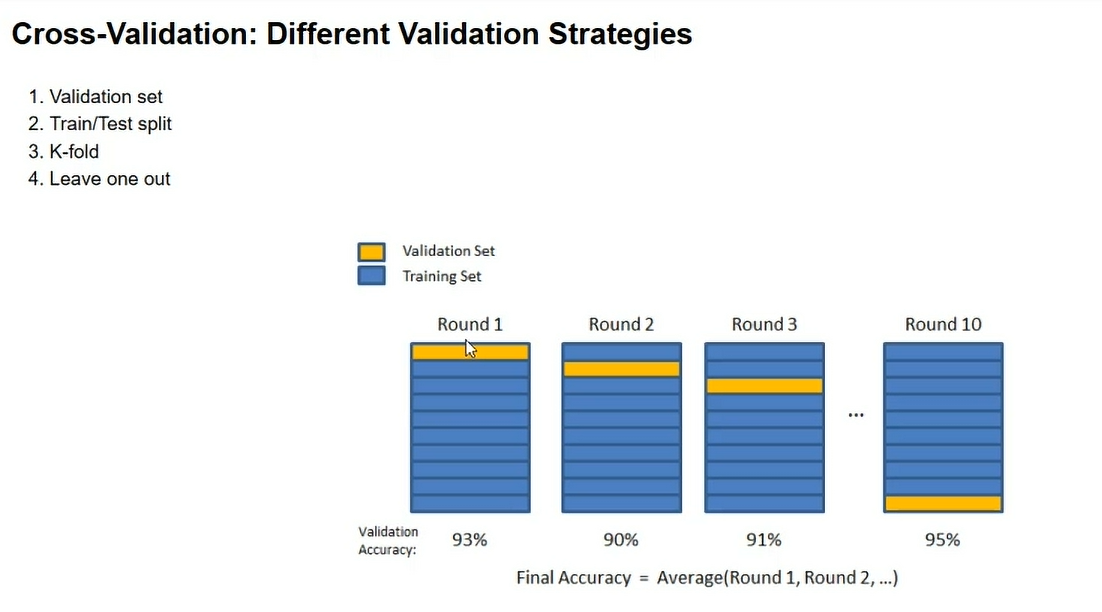

## Import Libraries

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Import Dataset

In [93]:
df = pd.read_csv('social_network_ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [94]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [95]:
df.drop(['User ID'], inplace=True, axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


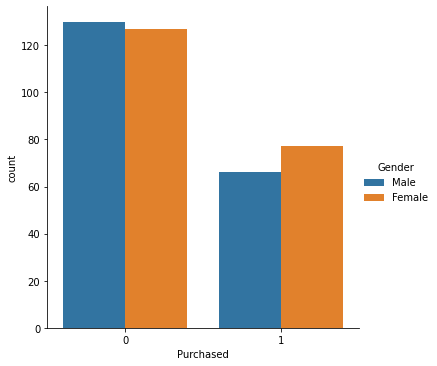

In [96]:
sns.catplot(x="Purchased",hue="Gender", kind="count",data=df)

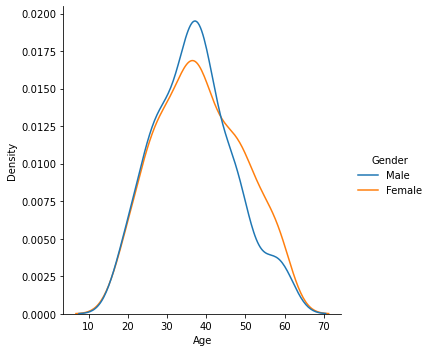

In [98]:
sns.displot(df, x="Age", kind="kde", hue="Gender")

## splitting data into train test

In [99]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [100]:
df = pd.get_dummies(df)
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [101]:
df.drop(['Gender_Female'], inplace=True, axis=1)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [102]:
x = df.loc[:, ['Age', 'EstimatedSalary', 'Gender_Male'] ].values
y = df.loc[:, ['Purchased'] ].values

In [103]:
x

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [105]:
print(x_train[0:5])
print(x_train.shape)

[[   37 79000     1]
 [   38 61000     1]
 [   20 74000     1]
 [   27 88000     1]
 [   23 28000     0]]
(320, 3)


In [106]:
print(x_test[0:5])
print(x_test.shape)

[[   42 65000     1]
 [   37 71000     0]
 [   42 90000     0]
 [   47 47000     0]
 [   23 48000     0]]
(80, 3)


In [107]:
print(y_train[0:5])
print(y_train.shape)

[[1]
 [0]
 [0]
 [0]
 [0]]
(320, 1)


In [108]:
print(y_test[0:5])
print(y_test.shape)

[[0]
 [0]
 [1]
 [0]
 [0]]
(80, 1)


## Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [110]:
x_train[0:5]

array([[-0.03449842,  0.26845438,  1.04475034],
       [ 0.06066963, -0.25929212,  1.04475034],
       [-1.65235532,  0.12185813,  1.04475034],
       [-0.98617895,  0.53232764,  1.04475034],
       [-1.36685117, -1.22682738, -0.95716648]])

## Training Model with SVM

In [111]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)

In [112]:
classifier.fit(x_train, y_train)

c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(random_state=0)

## Making Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  4]
 [ 2 26]]


In [120]:
accuracy_score(y_test, y_pred)

0.925

## Applying k-Fold cross validation

In [121]:
from sklearn.model_selection import cross_val_score

In [130]:
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [131]:
accuracies

array([0.9375 , 0.84375, 0.96875, 0.875  , 0.9375 , 0.90625, 0.90625,
       0.875  , 0.90625, 0.90625])

In [132]:
print("Accuracy: {:.2f}".format(accuracies.mean()*100))

Accuracy: 90.62


In [133]:
print("Standard Deviation: {:.2f}".format(accuracies.std()*100))

Standard Deviation: 3.42


# Grid Search CV

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
params = [
    {'C':[0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C':[0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

In [136]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1
                           )

In [137]:
grid_search.fit(x_train, y_train)

c:\Users\Farhad.lotfi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [140]:
grid_search.best_score_*100

90.9375

In [142]:
grid_search.best_params_

{'C': 0.5, 'gamma': 0.9, 'kernel': 'rbf'}